In [86]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [87]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables

# Declare a SQLAlchemy base using `automap_base()` to automatically generate my Python classes from my Postgresql DB tables
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)
   
# Create the SQLAlchemy inspector and connect it to the engine
# This allows the inspection of database tables from my Python code 
inspect = inspect(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


('2017-08-23',)


In [11]:
            
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
d_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", d_year_ago)

# Perform a query to retrieve the data and precipitation scores
ret_data = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= d_year_ago).all()
# print(f'Retrieve the data and precipitation scores: {ret_data}')
ret_data
df = pd.DataFrame(ret_data)
df.sort_values(by='date', ascending = True, inplace = True)

# Save the query results as a Pandas DataFrame and set the index to the date column
ax = df.set_index("date", inplace = True)

#Sort the dataframe by date
ax = df.sort_index()

#Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(title ="Rain fall by date - Hawaii",rot = 90, figsize=(15, 10), legend=True, fontsize=14)

ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("mm", fontsize=12)


NameError: name 'dt' is not defined

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number stations in the dataset

total_number_stations= Session.query(Station.station).count()
total_number_stations

9

In [113]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.date)]
active_stations = Session.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_temp_summary = Session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in station_temp_summary:
    print(station)

df.head()


('USC00519281', 12.2, 29.4, 22.03582251082252)


,prcp
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8


In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# *Choose the station with the highest number of temperature observations.
# *Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, 
       Measurement.tobs]
station_temps = Session.query(*sel).\
        filter(func.strftime(Measurement.date) >= d_year_ago, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

# Create a dataframe containing the results of this query
station_temps_df = pd.DataFrame(station_temps, columns=['Measurement Date', 'Temperature'])
station_temps_df.head()



,Measurement Date,Temperature
0,2016-08-23,25.0
1,2016-08-24,25.0
2,2016-08-25,26.7
3,2016-08-26,26.7
4,2016-08-27,23.9


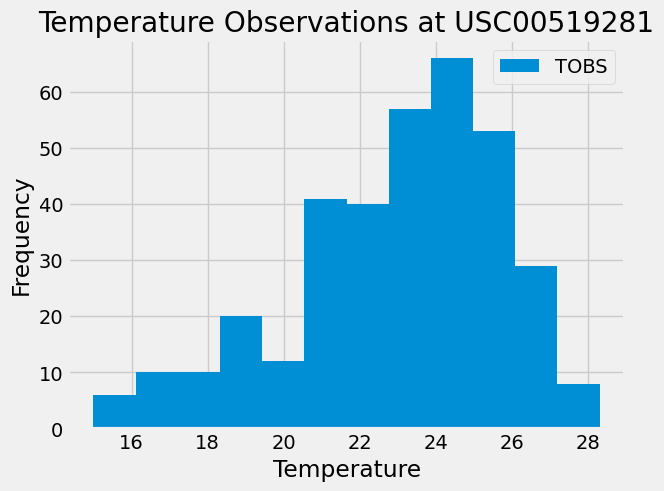

In [116]:
# Create a histogram to visualize the temperature observations from Station USC00519281 

plt.hist(station_temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(15,8)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

# Close session

In [117]:
# Close Session
Session.close()